# Exploratory Data Analysis (EDA)

### Done By: 

**Project Group 3**

Aung Naing Tun (A0199810W); 

Branda Phoon Ying Jie (A0202251B);

Lin Ru (A0202800B);

Mavis Neo (A0203855E); 

Neo Jia Tian (A0202689X)

## Project Introduction

### Problem Description

Automotive insurance fraud involves someone deceiving an insurance company about a claim involving their personal or commercial motor vehicle. It can involve giving out misleading information or providing false documentation to support the claim. 

Nearly one of 10 Americans would commit insurance fraud if they knew they could get away with it. Nearly one of four Americans say it’s ok to defraud insurers. About one in 10 people agree it’s ok to submit claims for items that aren’t lost or damaged, or for personal injuries that didn’t occur. Two of five people are “not very likely” or “not likely at all” to report someone who ripped off an insurer Accenture Ltd.(2003). Nearly three of 10 Americans (29 percent) wouldn't report insurance scams committed by someone they know (Progressive Insurance 2001). 



### About the Dataset

The dataset is obtained from Kaggle (dataset is obtained from Kaggle (https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection). It is a real database of an American insurance company, liberated by Oracle for teaching purposes. Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

The variables that are available in the dataset are:
1. Month - Month in which the accident occurred
2. WeekOfMonth - Week in the month of accident occurred
3. DayOfWeek - Day of the week of the accident occurred
4. Make - Car maker / car brand 
5. AccidentArea - Accident occurred in rural or urban area
6. DayOfWeekClaimed - Day of the week the accident was claimed
7. MonthClaimed - Month the accident was claimed occurred
8. WeekOfMonthClaimed - Week in the month of accident claimed occurred 
9. Sex - Gender of the person involved in the accident
10. MaritalStatus - Marital status of the person involved in the Accident
11. Age - Age of the person involved in the accident
12. Fault - Indicates if the insurance owner was responsible for the accident
13. PolicyType -  Combination of type of car (i.e., Vehicle Category) and type of policy (i.e., Base Policy). Values of PolicyType include: Liability (against third parties), Collision (includes damage to the owner's vehicle), All Perils (against all risks). 
14. VehicleCategory - Type of car / vehicle categorization
15. VehiclePrice - Price of the vehicle 
16. FraudFound_P - Indicates if the claim is fraudulent (The target variable)
17. PolicyNumber - Unique number of each entry
18. RepNumber - Enumeration between 1 and 16
19. Deductible - Insurance cost
20. DriverRating - Rating of driver involved in accident
21. Days_Policy_Accident - Days between insurance is acquired and the accident occurred
22. Days_Policy_Claim - Days between insurance is acquired and the accident was claimed
23. PastNumberOfClaims - Number of past claims of the insurance owner
24. AgeOfVehicle - Age of vehicle
25. AgeOfPolicyHolder - Age of the insurance owner
26. PoliceReportFiled - Indicates if accident was reported to police
27. WitnessPresent - Indicates if witness was present during the accident
28. AgentType - Internal fraud are those perpetrated against an insurance company or its policyholders by insurance agents, managers, executives, or other insurance employees while external fraud schemes are done by individuals or entities as diverse as policyholders, medical providers, beneficiaries, vendors, chiropractors and career criminals
29. NumberOfSuppliments - Supplements are non registered damages in the car, beacause they are not easily visible, usually internal components like suspension, chasis, etc.
30. AddressChange_Claim - If the insurance owner has changed address after the claim
31. NumberOfCars - Number of cars involved in the accident
32. Year - Year in which accident occured
33. BasePolicy - Type of insurance / type of policy. 

_**Side Note: The above description for all the variables are obtained from https://www.kaggle.com/code/cristiantorresds/vehicle-insurance-claim-espa-ol-english/notebook.**_


### Project Objective

This project's objective is to classify claims as fraud or legitimate using Machine Learning such that resources do not have to be wasted by assigning specialists to analyze every claim.

## Setting Up

### Installing & Importing Necessary Packages

In [1]:
"""Necessary Libs/Packages to Install"""
!pip install pyitlib

  Preparing metadata (setup.py) ... done
  Created wheel for pyitlib: filename=pyitlib-0.2.2-py3-none-any.whl size=28500 sha256=168dcdfb7b1e82d21dd61bc5a5316d8080e44f2132cbd109a7f44d466694cbae
  Stored in directory: /root/.cache/pip/wheels/14/96/d6/86e32d66e5bb0440dc344e75849266b2bf2939520672e33e4e
Successfully built pyitlib
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
"""Importing Necessary Libs/Packages"""
# General and data analysis/manipulating libs
import numpy as np
import pandas as pd


# For statistical tests
from scipy import stats


# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# For infomation gain entropy
from pyitlib import discrete_random_variable as drv


# For warnings suupressing 
import warnings
warnings.filterwarnings("ignore")


# So that to display plots inline within jupyter notebook directly below the code cell
%matplotlib inline 

### Importing & Loading the Dataset(s)

In [3]:
## Import the dataset 
fraud_df = pd.read_csv('./fraud_oracle.csv')

fraud_df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## Preliminary Data Analysis

In [4]:
## Checking the shape of the dataframe
fraud_df.shape

(15420, 33)

In [5]:
## Checking the df's info (all cols and their data types)
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Our dataset has a total of 15420 records and there are a total of 33 variables (with 32 being the feature variables and 1 being the target variable).

Since `FraudFound_P` is the target variable, for the remaining 32 feature variables, 8 of them are numerical.

In [6]:
## To get a descriptive statistics summary of the continuous variables in the df
fraud_df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [7]:
## Check for Missing values & Duplicates
print("Null Values: " + str(fraud_df.isnull().values.any()))
print("Duplicate Values: " + str(fraud_df.duplicated().any()))

Null Values: False
Duplicate Values: False


As can see from the above outputs, the dataset has no missing values and duplicated values. To ensure we have no data inaccuracy, we will check the unique values for each column. 

In [8]:
## Checking the num of unique values in each col.
print(fraud_df.nunique())

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

From the above output, since the number of unique values for `PolicyNumber` is the same as the total number of records of the dataframe (i.e., 15420 records), it means that this column is the unique identifier of each row of record/transaction (which confirms the variable description for this variable).

Then, we decided to examine the number of unique values of all the features w.r.t. the target variable `FraudFound_P` as well.

In [9]:
## To see the total no. of unique values of all the features wrt the target variable 'FraudFound_P'
print(fraud_df.groupby('FraudFound_P').nunique())

              Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  \
FraudFound_P                                                      
0                12            5          7    19             2   
1                12            5          7    15             2   

              DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex  \
FraudFound_P                                                            
0                            8            13                   5    2   
1                            7            12                   5    2   

              MaritalStatus  ...  AgeOfVehicle  AgeOfPolicyHolder  \
FraudFound_P                 ...                                    
0                         4  ...             8                  9   
1                         4  ...             8                  9   

              PoliceReportFiled  WitnessPresent  AgentType  \
FraudFound_P                                                 
0                             2      

After paying close attention to the above output, and together with the previous output that checked the number of unique values in each column, we noticed that variables such as `DayOfWeekClaimed` and `MonthClaimed`, are having strange number of unique values like 8 and 13 respectively. 

Thus, we decided to further conduct inspection on what are the unique values for each variable/column. 

In [10]:
## Further inspection on the unique values in each variable/col
for column in fraud_df:
    print(column)
    print(sorted(fraud_df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

Looking from the Unique Values per field, we observed and confirmed these potential columns may be causing data inaccuracy.

- `DayOfWeekClaimed` -> 8 unique values, extra value of '0' (only 7 days in a week)

- `MonthClaimed`-> 13 unique values, extra value of '0' (only 12 months in a year)

- `Age` -> value of '0' found in some entries

- `Days_Policy_Accident`-> 5 unique values, extra value of 'none' (intepreted as insurance acquired and accident occured on the same day)

- `Days_Policy_Claim`-> 4 unique values, extra value of 'none' (intepreted as insurance acquired and accident claimed on the same day)


Hence, we decided to check the records with inaccurate entries for the above fields as well. 

In [11]:
## Checking the zero values DayOfWeekClaimed 

checkRow = fraud_df[(fraud_df['DayOfWeekClaimed'] == '0')]
checkRow

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [12]:
## Checking the zero values MonthClaimed
checkRow = fraud_df[(fraud_df['MonthClaimed']=='0')]
checkRow

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [13]:
## Checking the none values Days_Policy_Claim
checkRow = fraud_df[(fraud_df['Days_Policy_Claim']=='none')]
checkRow

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [14]:
## Excluding the row with 0 value identified from DayofWeekClaimed, Days_Policy_Claim & MonthClaimed
fraud_df = fraud_df[~(fraud_df['DayOfWeekClaimed'] == '0')]

For the zero value identified from `DayofWeekClaimed` and `MonthClaimed`, we observed that they refer to the same row. Hence, we decide to remove it since this error only applies to 1 entry. 

In addition, this was also the same entry which had the `Days_Policy_Claim` has a value of 'none'. We observed that this is an invalid observation as `Days_Policy_Accident` is 'more than 30' while `Days_Policy_Claim` has a value of 'none'. This is illogical as the individual cannot be claiming on the same day he accquired the policy when the accident only happens 30 days after he acquired the policy.

Overall, this entry is not a Fraud case so this would not affect the insights we have in the future. 

In [15]:
## Checking the none values Days_Policy_Accident
checkRow = fraud_df[(fraud_df['Days_Policy_Accident'] == 'none')]
checkRow

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
204,Dec,3,Friday,Pontiac,Urban,Tuesday,Jan,3,Male,Married,...,7 years,36 to 40,No,No,External,none,2 to 3 years,1 vehicle,1994,All Perils
731,Mar,5,Thursday,Pontiac,Urban,Monday,May,3,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,All Perils
1073,Jun,5,Thursday,Honda,Urban,Friday,Jul,3,Male,Married,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
1210,Oct,3,Tuesday,Toyota,Urban,Thursday,Nov,1,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability
1308,Jul,3,Monday,Mazda,Urban,Tuesday,Sep,2,Female,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Liability
1453,May,4,Friday,Chevrolet,Urban,Monday,Jun,2,Male,Single,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,All Perils
1881,Mar,4,Wednesday,Dodge,Urban,Friday,Mar,4,Male,Married,...,more than 7,41 to 50,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
2010,Mar,3,Monday,Toyota,Urban,Wednesday,Mar,4,Male,Married,...,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils
2311,Mar,4,Friday,Honda,Urban,Wednesday,Apr,4,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
2458,Mar,5,Thursday,Honda,Rural,Monday,Apr,1,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


For `Days_Policy_Accident`, it is possible for the entries to be 'none'. This is because it is possible for the insurance owner to get into an accident on the same day he acquired the policy. Hence, we will keep these entries in the dataset.

In [16]:
# Checking the num of records/transactions of the target variable
nNonFraud = fraud_df['FraudFound_P'].value_counts()[0]
nFraud = fraud_df['FraudFound_P'].value_counts()[1]

checkAge = fraud_df[fraud_df["Age"] == 0]

## Proportion of Fraud and Non-fraud for age == 0
nZeroAgeNonFraud = checkAge.FraudFound_P.value_counts()[0]
nZeroAgeFraud = checkAge.FraudFound_P.value_counts()[1]

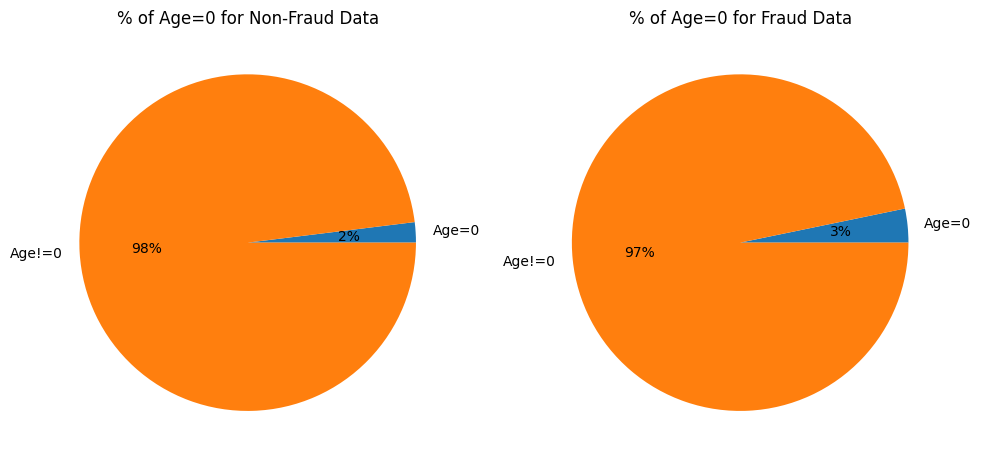

In [17]:
## Plotting the Proportion of Fraud and Non-fraud for age == 0

## define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:5]

data1 = [nZeroAgeNonFraud, nNonFraud]
labels = ['Age=0', 'Age!=0']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
# non-fraud
plt.title("% of Age=0 for Non-Fraud Data")
plt.pie(data1, labels = labels, autopct='%.0f%%')

data2 = [nZeroAgeFraud, nFraud]
plt.subplot(1, 2, 2)
# fraud
plt.title("% of Age=0 for Fraud Data")
plt.pie(data2, labels = labels, autopct='%.0f%%')

plt.tight_layout()

We decided to keep these data instead of removing it as we deem the proportion to be significant. In addition, the data would be left as 0 due to the possibility of it being an optional field so it can serve as information gain for fraud cases. 

### Grouping/Sorting of Variables 

In [18]:
# Extracting out all records of the target variable (i.e., FraudFound_P)
target_variable = fraud_df['FraudFound_P']
target_variable

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15419, dtype: int64

In [19]:
# Extracting out all other numerical features (i.e. those of int type but exclude PolicyNumber and the target variable)
numerical_variables = [
    'WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 
    'RepNumber', 'Deductible', 'DriverRating', 'Year'
    ]

numerical_variables

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

In [20]:
# Extracting out all categorical variables (i.e. those of object type)
cat_variables = list(fraud_df.select_dtypes(include=['object']).columns)
cat_variables

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

### Univariate Analysis of the Target Variable - FraudFound_P

In [21]:
# Checking the num of records/transactions of the target variable
fraud_df['FraudFound_P'].value_counts()

0    14496
1      923
Name: FraudFound_P, dtype: int64

In [22]:
# Printing the ratio of the target variable 
ratio_of_target = (fraud_df['FraudFound_P'].value_counts()) / len(fraud_df.index)
print(f'Non-Fradulent Cases in Ratio: {ratio_of_target[0]}\nFradulent Cases in Ratio: {ratio_of_target[1]}')

Non-Fradulent Cases in Ratio: 0.9401387898047863
Fradulent Cases in Ratio: 0.0598612101952137


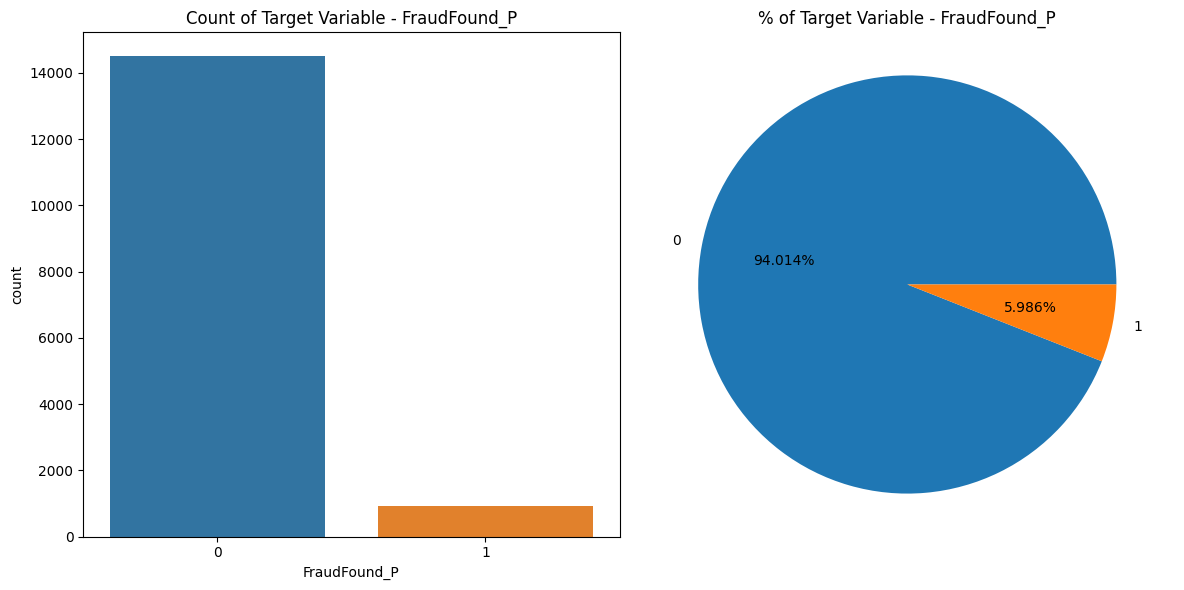

In [23]:
# Visualising the target variable to get a quick view of the ratio and % 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = "FraudFound_P", data = fraud_df).set_title("Count of Target Variable - FraudFound_P")

plt.subplot(1, 2, 2)
target_count = fraud_df.groupby('FraudFound_P')['PolicyNumber'].nunique()

pie_labels = '0', '1'
plt.pie(target_count, labels=pie_labels, autopct='%.3f%%')
plt.title("% of Target Variable - FraudFound_P")
plt.axis('equal')

plt.tight_layout()

From the information above, we can observe that the class imbalance problem exists in the data (i.e., the data is not very balanced). The percentage of the fradulent transactions is very low (only 5.986%). Hence, for this imbalanced dataset, in order to have models with better performance and increase the models' successful detections, **balancing of the class weights** will be done for the respective machine learning models using the parameter **class_weight**.

### Univariate Analysis of Numerical Variables/Features

In [24]:
# Checking the quantile statistics of the numerical features
quantile_stat = fraud_df[numerical_variables].describe().loc[['min', '25%', '50%', '75%', 'max']].transpose()
quantile_stat.columns = ['min', 'Q1', 'Q2', 'Q3', 'max']
quantile_stat['range'] = quantile_stat['max'] - quantile_stat['min']
quantile_stat['IQR'] = quantile_stat['Q3'] - quantile_stat['Q1']
quantile_stat

,min,Q1,Q2,Q3,max,range,IQR
WeekOfMonth,1.0,2.0,3.0,4.0,5.0,4.0,2.0
WeekOfMonthClaimed,1.0,2.0,3.0,4.0,5.0,4.0,2.0
Age,0.0,31.0,38.0,48.0,80.0,80.0,17.0
RepNumber,1.0,5.0,8.0,12.0,16.0,15.0,7.0
Deductible,300.0,400.0,400.0,400.0,700.0,400.0,0.0
DriverRating,1.0,1.0,2.0,3.0,4.0,3.0,2.0
Year,1994.0,1994.0,1995.0,1996.0,1996.0,2.0,2.0


In [25]:
# Checking the descriptive statistics of the numerical features
descriptive_stats = fraud_df[numerical_variables].describe().loc[['mean', 'std', '50%']].transpose()
descriptive_stats.columns = ['mean', 'std', 'median']
descriptive_stats['mode'] = fraud_df[numerical_variables].mode().transpose()[0]
descriptive_stats['MAD'] = [stats.median_abs_deviation(fraud_df[x]) for x in numerical_variables]
descriptive_stats['kurtosis'] = [stats.kurtosis(fraud_df[x], fisher=False) for x in numerical_variables]
descriptive_stats['excess kurtosis'] = [stats.kurtosis(fraud_df[x], fisher=True) for x in numerical_variables]
descriptive_stats['skewness'] = [stats.skew(fraud_df[x]) for x in numerical_variables]

descriptive_stats

,mean,std,median,mode,MAD,kurtosis,excess kurtosis,skewness
WeekOfMonth,2.788637,1.287611,3.0,3,1.0,1.898753,-1.101247,0.115311
WeekOfMonthClaimed,2.694079,1.259082,3.0,2,1.0,1.914466,-1.085534,0.158137
Age,39.858292,13.488996,38.0,30,8.0,3.797012,0.797012,0.153522
RepNumber,8.482846,4.599798,8.0,7,4.0,1.808216,-1.191784,0.006720
Deductible,407.704780,43.952379,400.0,400,0.0,39.807750,36.807750,6.077999
DriverRating,2.487840,1.119482,2.0,1,1.0,1.636698,-1.363302,0.009203
Year,1994.866528,0.803309,1995.0,1994,1.0,1.589333,-1.410667,0.245557


From the descriptive statistics generated in the above table, we found out that, for the numerical feature `Deductible`, its distribution has heavier tail (based on it having an excess kurtosis value of about 36.808) and it is quite right-skewed (with a value of about 6.0780 in skewness) as compared to other numerical features. 

Hence, the following histogram plots are explored to visualise the numerical features. 

array([[<AxesSubplot:title={'center':'WeekOfMonth'}>,
        <AxesSubplot:title={'center':'WeekOfMonthClaimed'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'RepNumber'}>,
        <AxesSubplot:title={'center':'Deductible'}>,
        <AxesSubplot:title={'center':'DriverRating'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

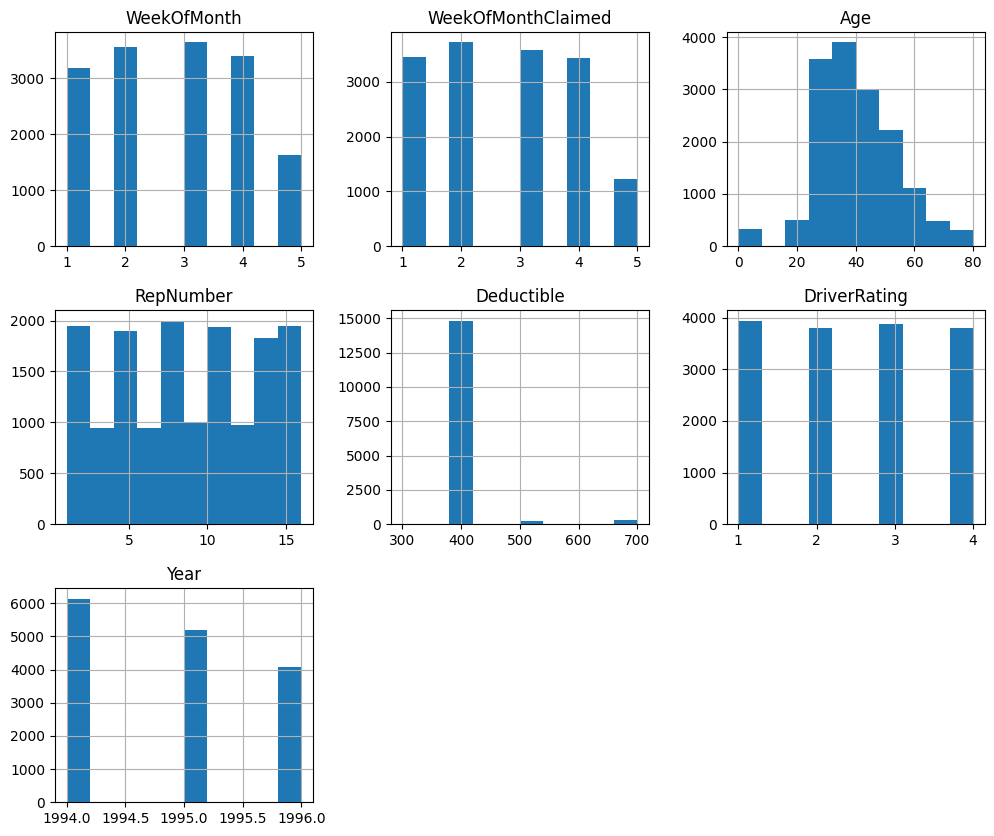

In [26]:
## Plotting of histograms for all the numerical variables 
fraud_df[numerical_variables].hist(figsize=(12, 10))

From the histogram plot above, we can observe that:
- `Age`, `Deductibles` and `Year` distribution seems to be right-skewed.
- The number of claims made for `WeekOfMonth` and `WeekOfMonthClaimed` is more or less distributed among 1, 2, 3, and 4. The least number of claims were made for week 5, probably due to the fact that only a few months have 5 weeks in each year.
- `RepNumber` is rather spread out with sharp decreases in certain ranges.
- Majority of `Deductible` are found to be listed as 400.
- `Driver Rating` is evenly distributed.
- There is a decreasing trend in claims made from 1994 to 1996.

### Bivariate/Multivariate Analysis of Numerical Variables/Features

#### Qualitative Analysis

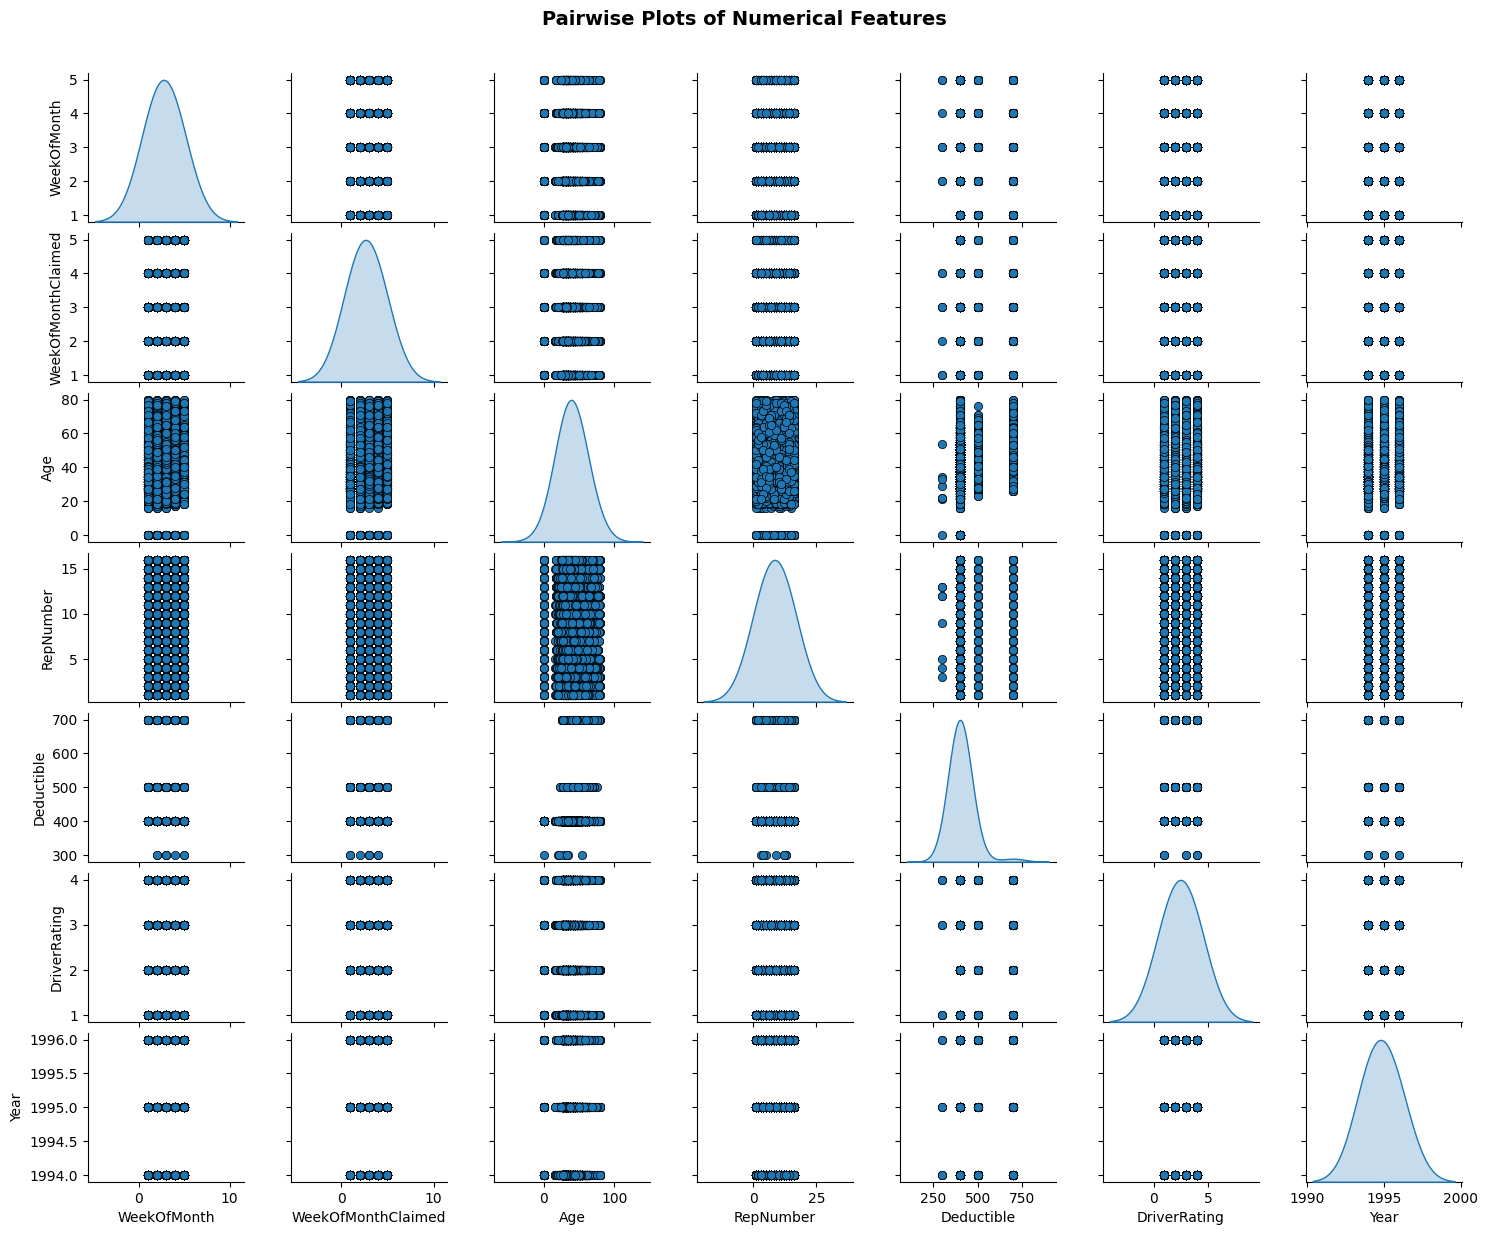

In [27]:
## Analysing the relationships between the numerical features
pg = sns.pairplot(fraud_df[numerical_variables], 
                  height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", 
                  diag_kws=dict(shade=True, bw_method=1.5)
                 )

fig = pg.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots of Numerical Features', fontsize=14, fontweight='bold')

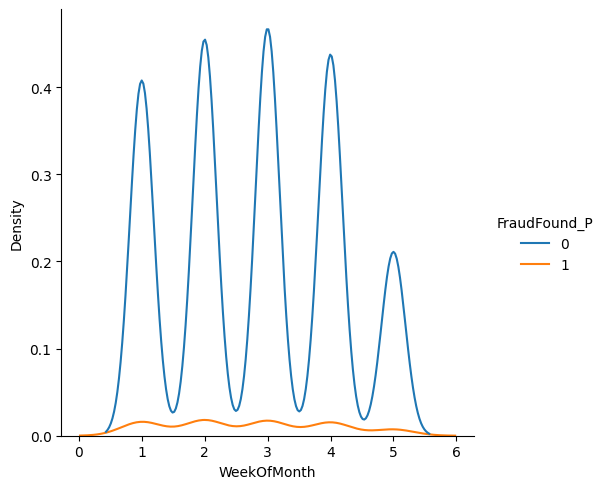

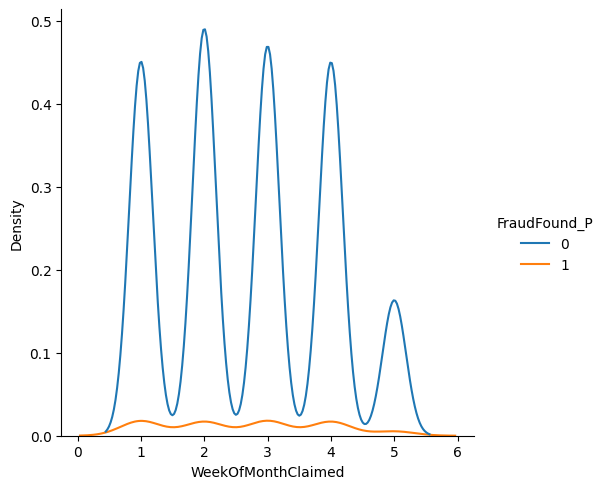

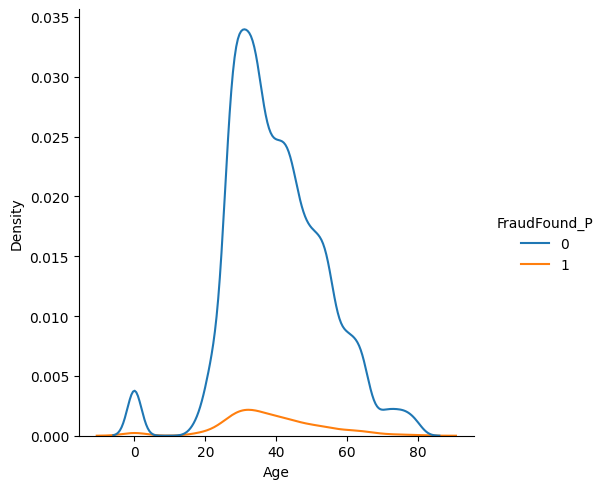

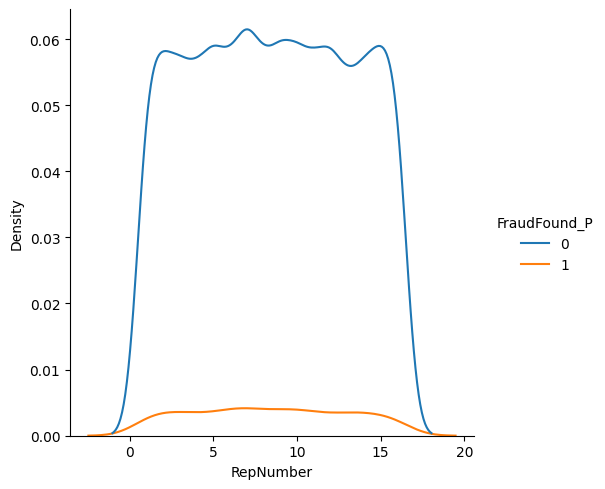

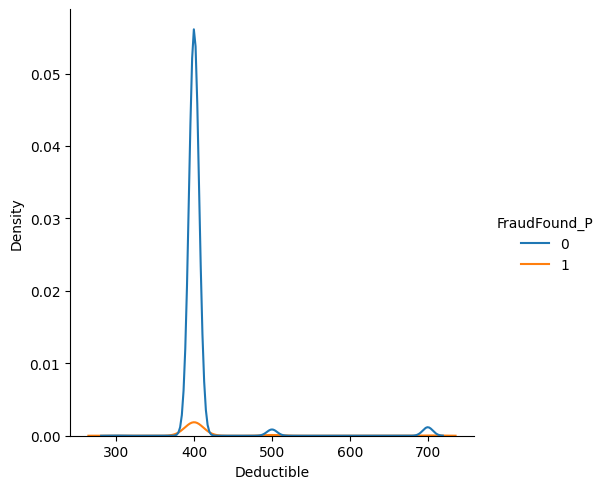

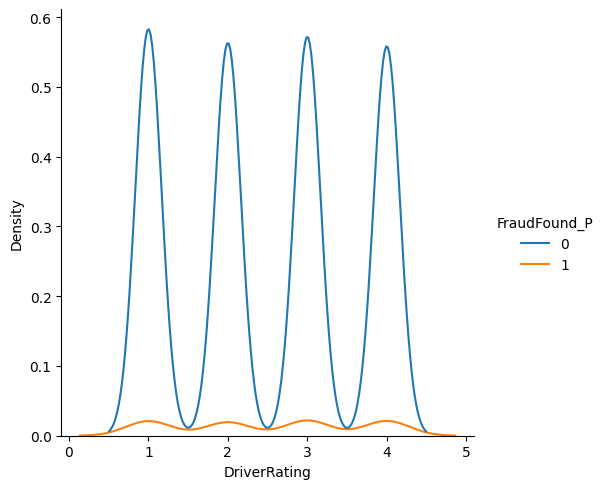

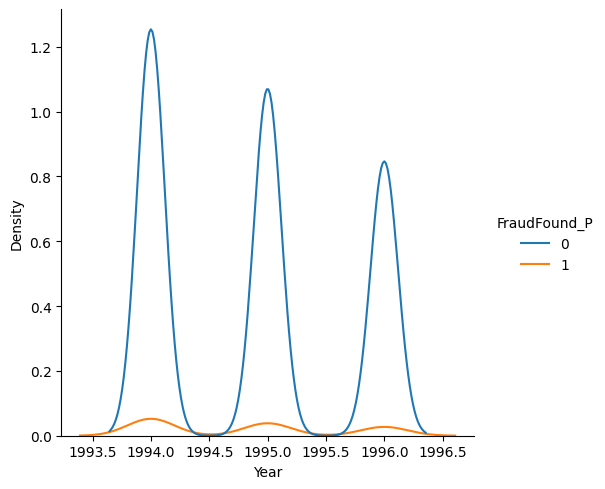

In [28]:
## Displots with kernel density smoothing to analyse the distributions of the numerical features wrt the target variable 
for index, name in enumerate(numerical_variables):
    sns.displot(fraud_df, x=name, hue='FraudFound_P', kind="kde")
    

We can observe that the distribution of fraud data follow the distribution of non-fraud data closely as no significant difference between fraud and non-fraud can be observed.

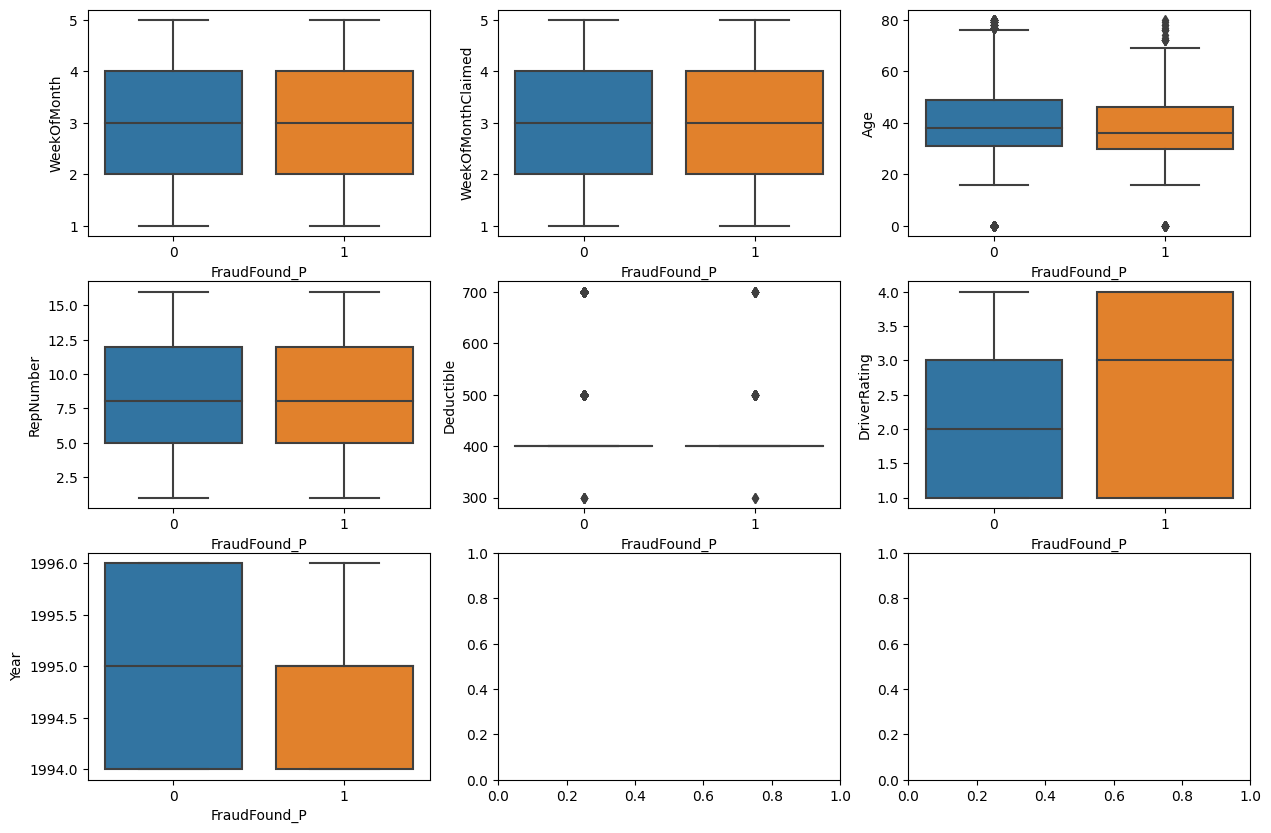

In [29]:
## Analysing the relationships of the numerical features wrt the target variable 
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

for var, subplot in zip(numerical_variables, ax.flatten()):
    sns.boxplot(x='FraudFound_P', y=var, data=fraud_df, ax=subplot)

From the above Box Plot, we can observe that, there are outliers for the numerical feature `Age` when it's analysed with respect to (w.r.t.) the target variable `FraudFound_P`.

#### Quantitative Analysis

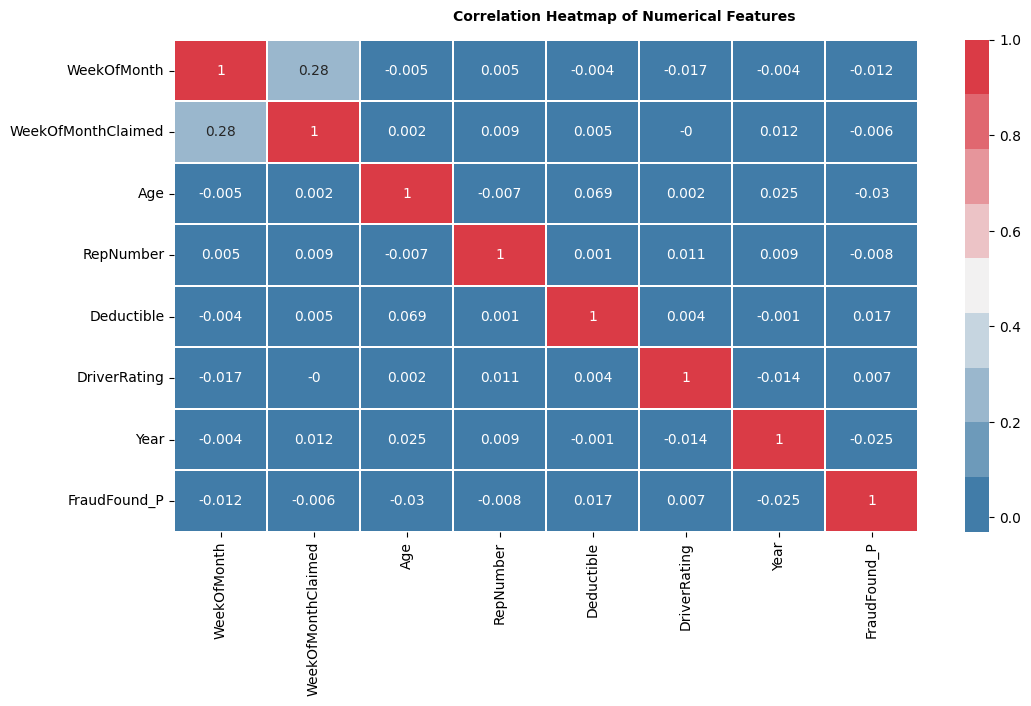

In [33]:
## Analysing the correlation between the numerical features 
fig, ax = plt.subplots(1,1, figsize=(12,6))

hm = sns.heatmap(round(fraud_df[numerical_variables+['FraudFound_P']].corr(), 3), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap=sns.diverging_palette(240, 10, n=9), # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap of Numerical Features', fontsize=10, fontweight='bold')

From the above Correlation Heatmap result output, we can see that moderate positive correlation exists between `WeekOfMonth` and `WeekOfMonthClaimed` (as the correlation coefficient of 0.28 is between 0.2 and 0.4). This means that, when deciding/selecting the features to be included for modelling, one of them should be excluded so that we can include other features which might be more relevant. 

Overall, there seem to be relatively weak correlation between the other numerical variables. 

### Univariate Analysis of the Categorical Variables/Features

In [35]:
## Order some of the ordinal columns so that it is easy to interpret in the graphs

# VehiclePrice
fraud_df["VehiclePrice"] = pd.Categorical(fraud_df["VehiclePrice"], ordered=True, 
    categories=['less than 20000','20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000'])

# Days_Policy_Accident
fraud_df["Days_Policy_Accident"] = pd.Categorical(fraud_df["Days_Policy_Accident"], ordered=True, 
    categories=['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30'])

# PastNumberOfClaims
fraud_df["PastNumberOfClaims"] = pd.Categorical(fraud_df["PastNumberOfClaims"], ordered=True, 
    categories=['none', '1', '2 to 4','more than 4'])

# AgeOfVehicle
fraud_df["AgeOfVehicle"] = pd.Categorical(fraud_df["AgeOfVehicle"], ordered=True, 
    categories=['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'] )

# AgeOfPolicyHolder
fraud_df["AgeOfPolicyHolder"] = pd.Categorical(fraud_df["AgeOfPolicyHolder"], ordered=True, 
    categories=['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65','over 65'])

# NumberOfSuppliments
fraud_df["NumberOfSuppliments"] = pd.Categorical(fraud_df["NumberOfSuppliments"], ordered=True, 
    categories=['none', '1 to 2', '3 to 5','more than 5'])

# AddressChange_Claim
fraud_df["AddressChange_Claim"] = pd.Categorical(fraud_df["AddressChange_Claim"], ordered=True, 
    categories=['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years'])

# Month
fraud_df["Month"] = pd.Categorical(fraud_df["Month"], ordered=True, 
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# MonthClaimed
fraud_df["MonthClaimed"] = pd.Categorical(fraud_df["MonthClaimed"], ordered=True, 
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# DayOfWeek
fraud_df["DayOfWeek"] = pd.Categorical(fraud_df["DayOfWeek"], ordered=True, 
    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])


# DayOfWeekClaimed
fraud_df["DayOfWeekClaimed"] = pd.Categorical(fraud_df["DayOfWeekClaimed"], ordered=True, 
    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Days_Policy_Claim
fraud_df["Days_Policy_Claim"] = pd.Categorical(fraud_df["Days_Policy_Claim"], ordered=True, 
    categories=['8 to 15', '15 to 30', 'more than 30'])

# NumberOfCars
fraud_df["NumberOfCars"] = pd.Categorical(fraud_df["NumberOfCars"], ordered=True, 
    categories=['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8'])

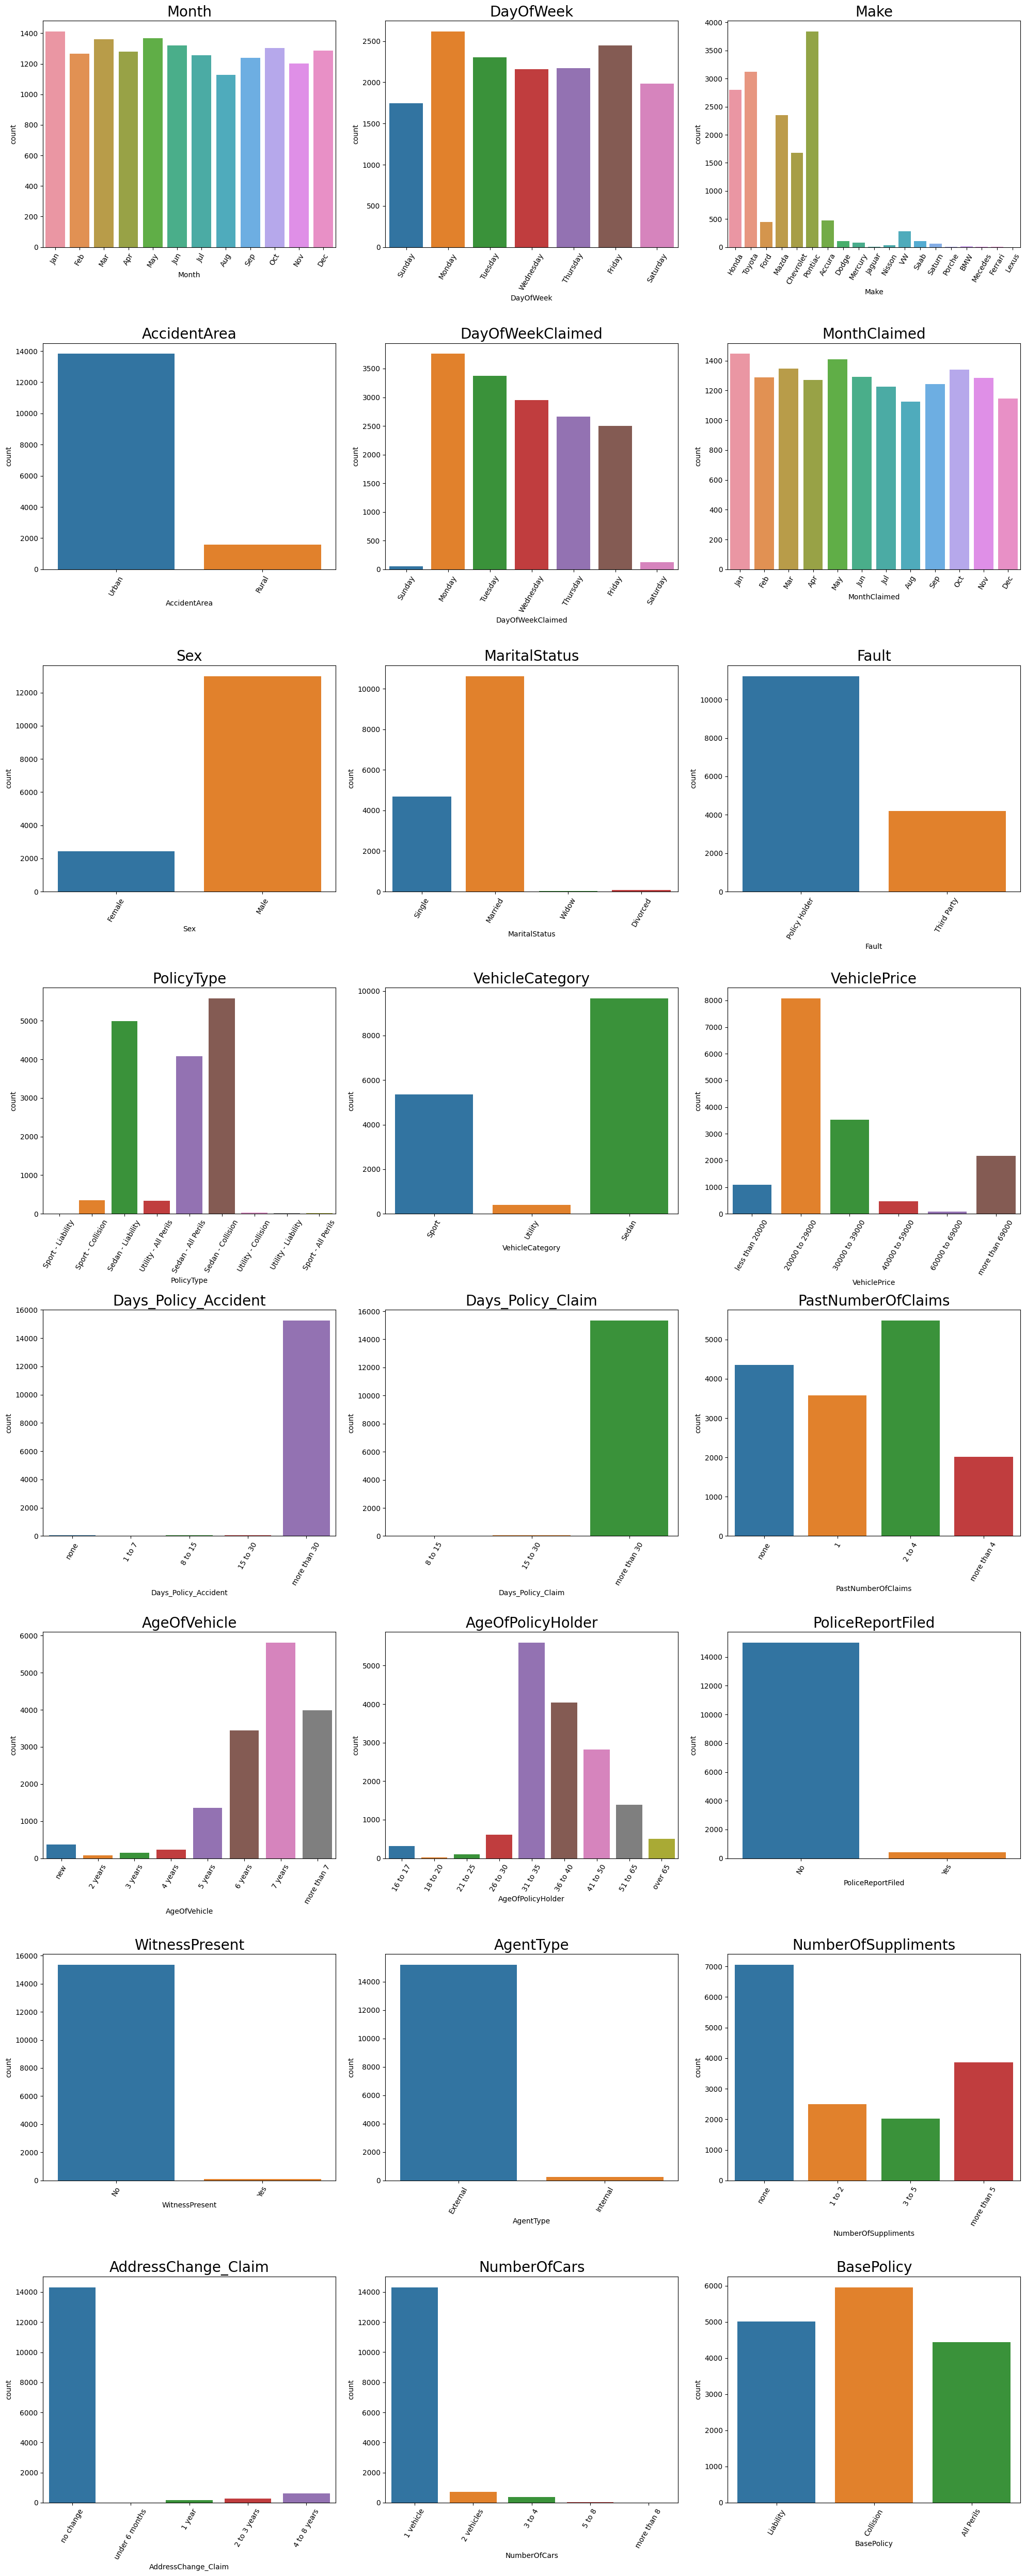

In [36]:
## Univariate analysis of cat variables

f, axes = plt.subplots(8, 3, figsize=(20, 50), sharex=False)

for index, name in enumerate(cat_variables):
    sns.countplot(x=name, data=fraud_df, ax=axes[index//3,index%3])
    axes[index//3,index%3].set_title(name, fontsize=20)
    #print(axes[index//3,index%3].get_xticklabels())
    axes[index//3,index%3].set_xticklabels(axes[index//3,index%3].get_xticklabels(), rotation=60)
    
plt.tight_layout()

We can observe that:
- August had the least number of accidents while January had the most number of accidents.
- Sunday had the least number of accidents while Monday had the most number of accidents.
- The most number of the claims involved the vehicle make of Pontiac.
- Majority of accidents happened in the urban area.
- The most number of claims were made on Monday while Sunday had the least number of claims.
- The most number of claims were made in January and the least number of claims were made in August.
- There were more males involved in the accidents compared to females.
- Majority of the people involved in the accident were mostly single or married, with married having the most.
- There were more faults due to policy holder compared to third party.
- Majority of the claims lie under the `PolicyType` of Sedan - Collision, Sedan - Liability, and Sedan - All Perils, with Sedan - Collision having the most number of claims.
- Majority of the accidents involved the `VehicleCategory` of Sedan and Sport and a smaller proportion under Utility.
- Vehicles priced 20000 to 29000 had the highest number of claims made while vehicles priced 60000 to 69000 had the least number of claims made. 
- Majority of accidents happened more than 30 days after insurance was acquired.
- Majority of claims were made more than 30 days after insurance was acquired. 
- Out of the claims made, insurance owners with 2 to 4 past claims had the highest number while insurance owners with more than 4 past claims had the least number of claims. 
- Most of the vehicles involved in the accidents were aged 7 years while vehicles aged 2 years had the least number of accidents.
- Most of the policy holders are aged 31 to 35 years old while a minority of them were aged 18 to 20 years old.
- Most of the accidents did not have a police report filed. 
- There were witness present for most of the accidents.
- Most of the policies have the an external `AgentType`.
- Claims with no supplements had the highest count while claims with 3 to 5 supplements had the lowest count.
- Most of the claims had no address change.
- The number of vehicles involved in the accident is mostly 1.
- Out of all the claims made, `BasePolicy` of Collision had the highest count while All Perils had the lowest count. 

### Bivariate/Multivariate Analysis of the Categorical Variables/Features

#### Qualitative Analysis

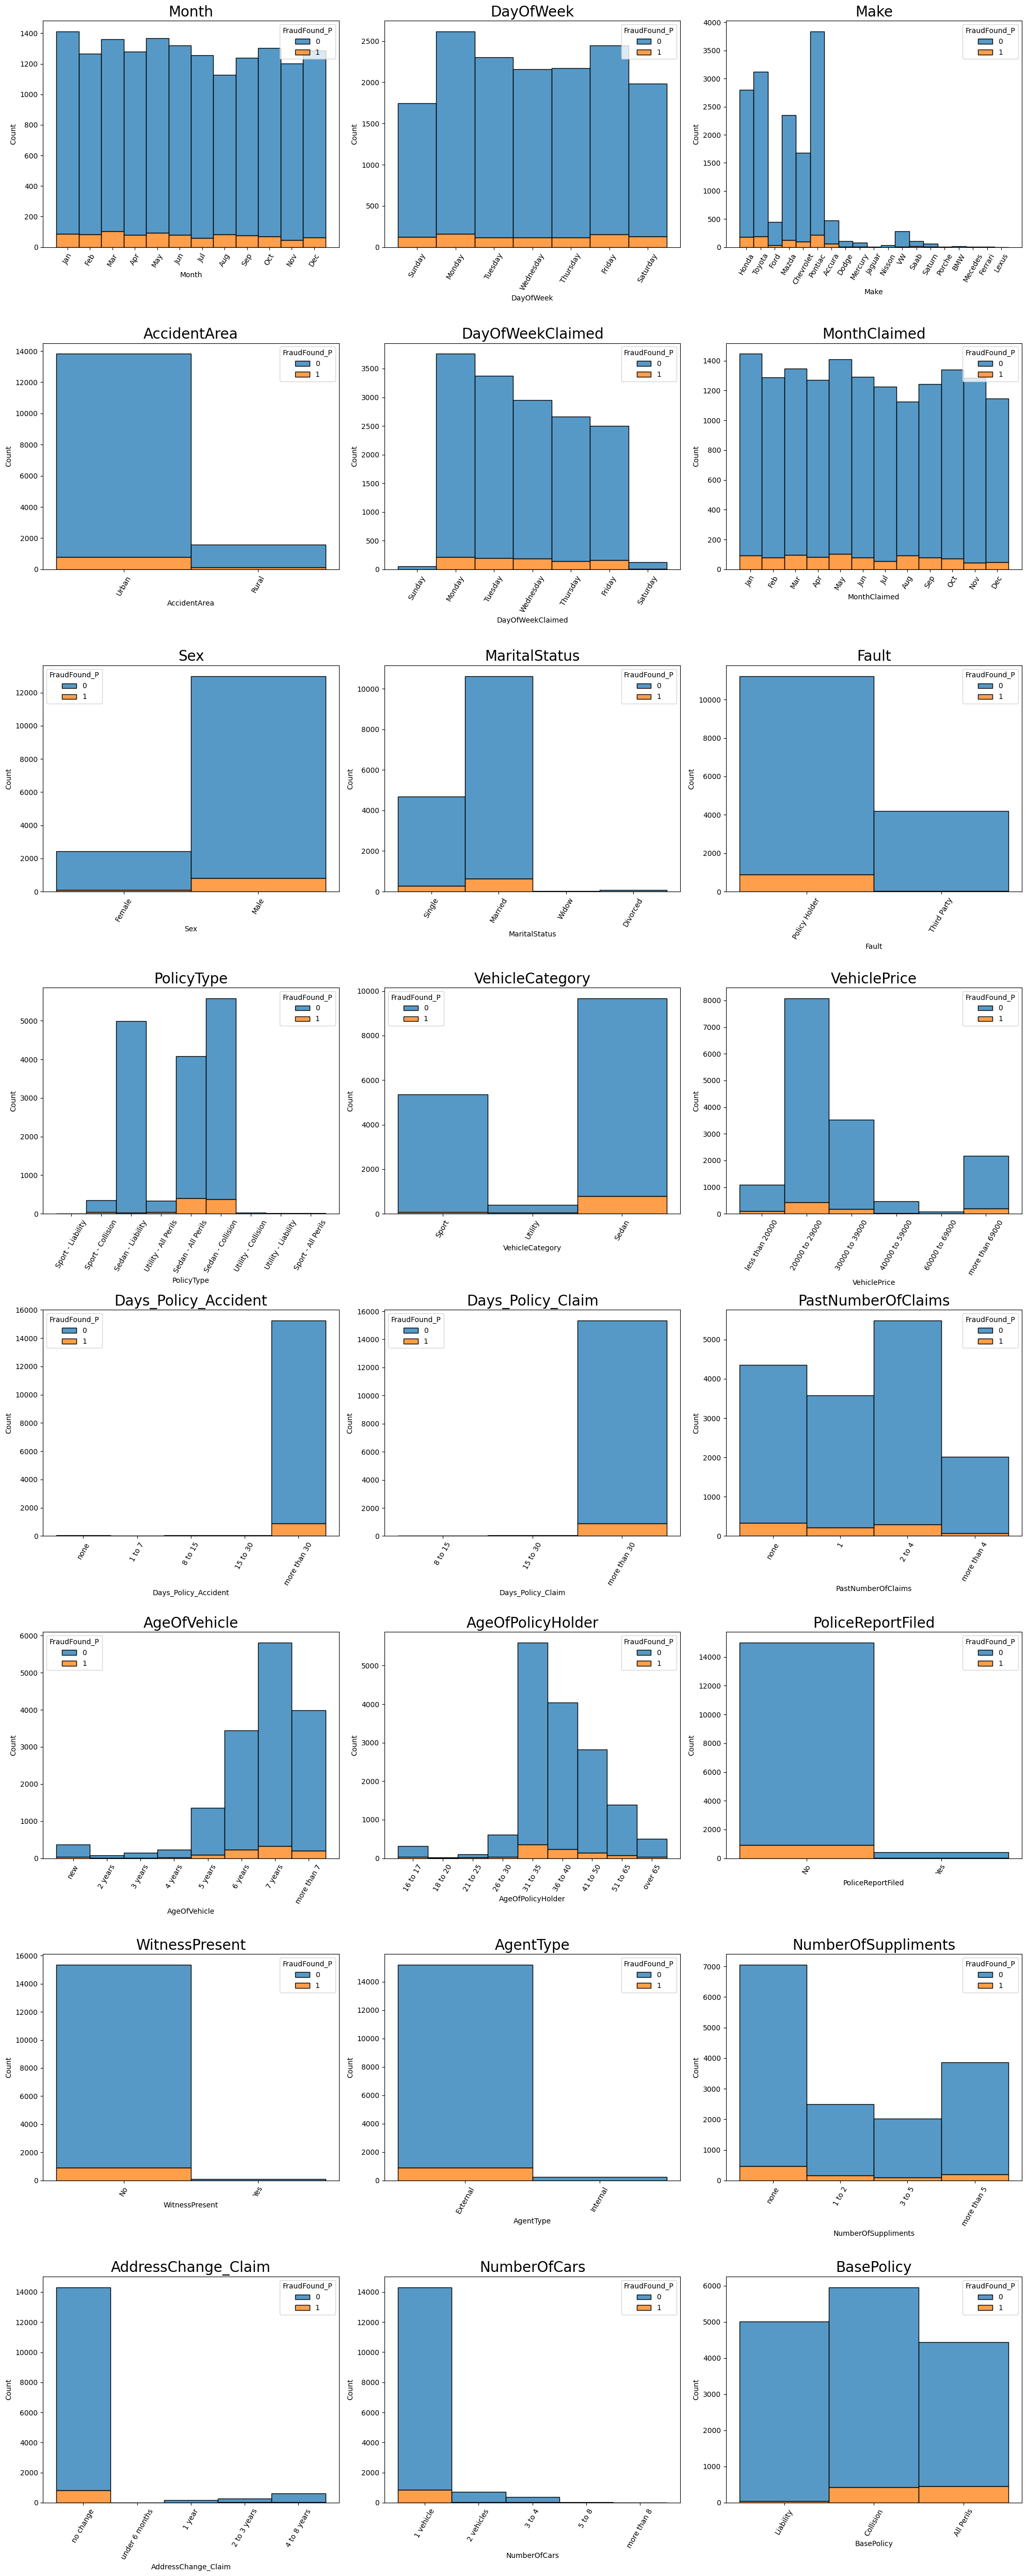

In [37]:
## Analysing the relationships of the categorical features wrt the target variable 
fig, axes = plt.subplots(8, 3, figsize=(20, 50), sharex=False)

for index, name in enumerate(cat_variables):
    chart= sns.histplot(x=name, data=fraud_df, ax=axes[index//3,index%3], hue='FraudFound_P', multiple='stack')

    axes[index//3,index%3].set_title(name, fontsize=20)

    # Must draw the canvas to position the ticks (https://stackoverflow.com/questions/41122923/getting-empty-tick-labels-before-showing-a-plot-in-matplotlib)
    fig.canvas.draw()

    #print(axes[index//3,index%3].get_xticklabels())
    axes[index//3,index%3].set_xticklabels(axes[index//3,index%3].get_xticklabels(), rotation=60)
    
plt.tight_layout()


From the histogram charts above which allow us to observe the proportion fraudulent entries in the various categorical data, we can see that there are some fields where we can see clear distinction in the proportion of fraudulent data. 

For example, for `Base Policy` we can see that all entries are approximatedly eventually distributed between the 3 types of base policies, however, `Collisions` and `All Perils` have a greater proportion of fraudulent entries as compared to `Liability`. This would be mean `Base Policy` is an important variable that may signal fraud. <br>
Hence, we have recognised these fields to be the more important features that we would like to include in our model building:

- `Fault` - There is a greater proportion of fraudulent entries observed in "Policy Holder" than "Third Party"
- `VehicleCategory` - There is a greater proportion of fraudulent entries observed in "Sedan" than "Sport" and "Utility"
- `PoliceReportFiled` - There is a greater proportion of fraudulent entries observed in "No" than "Yes"
- `AgentType` - There is a greater proportion of fraudulent entries observed in "Exteral" than "Internal"
- `BasePolicy` - There is a greater proportion of fraudulent entries observed in "Collisions" and "All Perils" than "Liability"


#### Quantitative Analysis

**1. Chi-Square Test**

**H0**: Tendency of fraud is independent of the categorical variable/feature we are testing for 
**Ha**: Tendency of fraud depends on the values of the categorical variable/feature we are testing for

In [ ]:
## Categorical vs Categorical (Test of Independence)
from scipy.stats import chi2_contingency

alpha = 0.05

#notIndp = []
for column in cat_variables:

    contingency = pd.crosstab(target_variable, fraud_df[column])
    c, p, dof, expected = chi2_contingency(contingency)

    print(f"{column} & FraudFound_P with P-value: {p}")

    if(p <= 0.05):
        print("Reject the null hypothesis at 95% level of confidence")
    else:
        print("DO NOT reject the null hypothesis at 95% level of confidence")

    print()

Month & FraudFound_P with P-value: 0.001720902092411024
Reject the null hypothesis at 95% level of confidence

DayOfWeek & FraudFound_P with P-value: 0.11836116248221312
DO NOT reject the null hypothesis at 95% level of confidence

Make & FraudFound_P with P-value: 2.191573083758743e-06
Reject the null hypothesis at 95% level of confidence

AccidentArea & FraudFound_P with P-value: 3.9363035441822304e-05
Reject the null hypothesis at 95% level of confidence

DayOfWeekClaimed & FraudFound_P with P-value: 0.531606316331255
DO NOT reject the null hypothesis at 95% level of confidence

MonthClaimed & FraudFound_P with P-value: 1.4952445828227383e-05
Reject the null hypothesis at 95% level of confidence

Sex & FraudFound_P with P-value: 0.00023911350965670757
Reject the null hypothesis at 95% level of confidence

MaritalStatus & FraudFound_P with P-value: 0.7982546576174133
DO NOT reject the null hypothesis at 95% level of confidence

Fault & FraudFound_P with P-value: 1.4061798322083448e-5

From the **Chi-Square Test** above, we can observe that the following categorical variables may be related to the tendency of fraud: `Month`, `Make`, `AccidentArea`, `MonthClaimed`, `Sex`, `Fault`, `PolicyType`, `VehicleCategory`, `VehiclePrice`, `Days_Policy_Accident`, `PastNumberOfClaims`, `AgeOfVehicle`, `AgeOfPolicyHolder`, `AgentType`, `NumberOfSuppliments`, `AddressChange_Claim`, `BasePolicy`.

**2. Information Gain**

In [39]:
## Cat vs Cat - using Infomation Gain


# Compute Entropy
entropies = pd.DataFrame([(x, drv.entropy(fraud_df[x])) for x in cat_variables], columns=['cat1', 'H(cat1)'])

# Compute Conditional Entropy
results = []
for cat1 in cat_variables:
    for cat2 in cat_variables:
        if cat1!=cat2:
            results.append((cat1, cat2, drv.entropy_conditional(fraud_df[cat1], fraud_df[cat2])))

conditional_entropy = pd.DataFrame(results, columns=['cat1', 'cat2', 'H(cat1|cat2)'])

information_gain = entropies.merge(conditional_entropy)
information_gain['information gain'] = information_gain['H(cat1)'] - information_gain['H(cat1|cat2)']

information_gain.head()

,cat1,H(cat1),cat2,H(cat1|cat2),information gain
0,Month,3.58256977758214,DayOfWeek,3.573333332392997,0.009236
1,Month,3.58256977758214,Make,3.574166765193884,0.008403
2,Month,3.58256977758214,AccidentArea,3.58197057508306,0.000599
3,Month,3.58256977758214,DayOfWeekClaimed,3.574322234810407,0.008248
4,Month,3.58256977758214,MonthClaimed,1.1100064910239786,2.472563


In [40]:
information_gain.pivot_table(values='information gain', index='cat1', columns='cat2', aggfunc=np.sum)

cat2,AccidentArea,AddressChange_Claim,AgeOfPolicyHolder,AgeOfVehicle,AgentType,BasePolicy,DayOfWeek,DayOfWeekClaimed,Days_Policy_Accident,Days_Policy_Claim,...,MonthClaimed,NumberOfCars,NumberOfSuppliments,PastNumberOfClaims,PoliceReportFiled,PolicyType,Sex,VehicleCategory,VehiclePrice,WitnessPresent
cat1,,,,,,,,,,,,,,,,,,,,,
AccidentArea,NaN,0.000500,0.000538,0.000472,0.000019,0.002433,0.000694,0.000405,0.000212,0.000041,...,0.000763,0.000214,0.000298,0.002952,0.000002,0.003630,8.724707e-04,0.003144,0.000477,0.000457
AddressChange_Claim,0.000500,NaN,0.001321,0.001228,0.000992,0.000426,0.000924,0.000999,0.000815,0.000313,...,0.001815,0.247173,0.000355,0.000852,0.000787,0.001473,7.580792e-05,0.000239,0.000902,0.000256
AgeOfPolicyHolder,0.000538,0.001321,NaN,0.726086,0.000429,0.019234,0.004295,0.003016,0.002314,0.001082,...,0.014474,0.001047,0.025526,0.003289,0.000307,0.033525,1.689138e-02,0.009804,0.082842,0.000194
AgeOfVehicle,0.000472,0.001228,0.726086,NaN,0.000561,0.013789,0.002700,0.002278,0.002959,0.001145,...,0.015006,0.000606,0.036288,0.003994,0.000330,0.024572,3.428132e-02,0.007558,0.097334,0.000475
AgentType,0.000019,0.000992,0.000429,0.000561,NaN,0.008004,0.000244,0.000507,0.000186,0.000114,...,0.001054,0.001173,0.000806,0.000587,0.000300,0.009167,1.243201e-04,0.001342,0.006086,0.000071
BasePolicy,0.002433,0.000426,0.019234,0.013789,0.008004,NaN,0.003277,0.000908,0.001446,0.000584,...,0.002560,0.000201,0.002042,0.104356,0.001452,1.574391,3.528867e-03,0.807010,0.057205,0.001406
DayOfWeek,0.000694,0.000924,0.004295,0.002700,0.000244,0.003277,NaN,0.092597,0.001489,0.000742,...,0.003705,0.000961,0.000897,0.001386,0.000395,0.006224,5.314546e-04,0.004764,0.002461,0.000065
DayOfWeekClaimed,0.000405,0.000999,0.003016,0.002278,0.000507,0.000908,0.092597,NaN,0.001159,0.000944,...,0.010587,0.001231,0.000910,0.000926,0.000472,0.004410,5.159670e-05,0.001186,0.001071,0.000254
Days_Policy_Accident,0.000212,0.000815,0.002314,0.002959,0.000186,0.001446,0.001489,0.001159,NaN,0.032928,...,0.002186,0.001013,0.008669,0.002704,0.000240,0.002064,1.946864e-04,0.000904,0.001249,0.000541


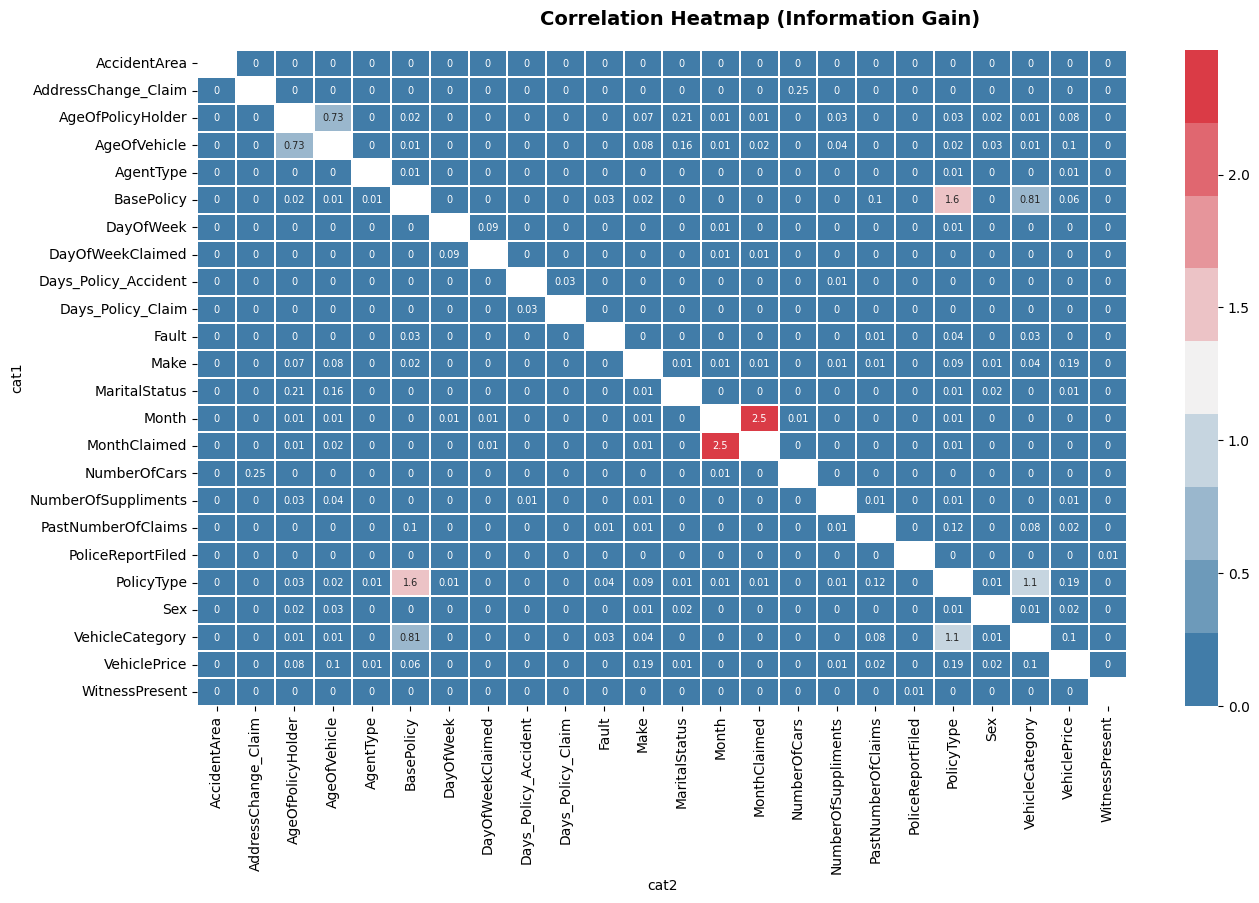

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap=sns.diverging_palette(240, 10, n=9), # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 annot_kws={"size": 7},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap (Information Gain)', fontsize=14, fontweight='bold')

Based on the Information Graph above, we have identified the following: 
- `MonthClaimed` and `Month` have high degree of information gain, this indicates high correlation between the two variables.
- `Policy Type` and `Base Policy` and `Vehicle Category` have high degree of information gain, this indicates high correlation between the three variables.

Hence, when deciding which variables should be included in the machine learning model(feature selection), only one of the 2 or 3 variables should be added to best optimise the model training process.

## Overall Findings 

With insights from the EDA, we have decided to select the following features for models exploration: `WeekOfMonthClaimed`, `Age`, `RepNumber`, `Deductible`, `DriverRating`,`Year`, `Month`,`Make`,`AccidentArea`, `Sex`, `Fault`, `PolicyType`, `VehiclePrice`, `Days_Policy_Accident`, `PastNumberOfClaims`, `AgeOfVehicle`, `AgeOfPolicyHolder`, `AgentType`, `NumberOfSuppliments`, `AddressChange_Claim` to predict `FraudFound_P`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39c449af-1ed1-41b1-8c6c-19d403131f75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>